In [2]:
import numpy as np
import re
from collections import Counter

def count_classes(npz_path):
    """
    Loads an .npz file with embeddings and image paths.
    Extracts class numbers from file names formatted like name_class.jpg.
    Returns counts per class (1–9).
    """
    data = np.load(npz_path, allow_pickle=True)
    
    # You might need to adjust the key name here depending on your file
    image_paths = data['paths'] if 'paths' in data else data['image_paths']

    class_counts = Counter()

    for path in image_paths:
        path = str(path)  # ensure it's a string
        match = re.search(r"_([1-9])\.jpg$", path)
        if match:
            class_num = int(match.group(1))
            class_counts[class_num] += 1

    # Print results in sorted order
    for cls in range(1, 10):
        print(f"Class {cls}: {class_counts.get(cls, 0)}")

    return class_counts


# Example usage:
# counts = count_classes("your_file.npz")


In [1]:
import re
from collections import Counter

def count_classes_from_txt(txt_path):
    """
    Reads a text file with image paths.
    Extracts class numbers (1–9) from filenames that end with '_<class>.jpg'.
    Example: 'image_3.jpg' -> class 3
    Returns and prints counts per class.
    """
    class_counts = Counter()

    with open(txt_path, "r") as f:
        for line in f:
            path = line.strip()
            if not path:
                continue
            # Match filenames ending in _<digit>.jpg or _<digit>.jpeg or _<digit>.png
            match = re.search(r"_([1-9])\.(?:jpg|jpeg|png)$", path, re.IGNORECASE)
            if match:
                class_num = int(match.group(1))
                class_counts[class_num] += 1

    # Print results in sorted order
    print(f"\nClass counts for: {txt_path}\n{'-'*40}")
    for cls in range(1, 10):
        print(f"Class {cls}: {class_counts.get(cls, 0)}")

    total = sum(class_counts.values())
    print(f"\nTotal images: {total}")

    return class_counts


# Example usage:
# counts = count_classes_from_txt("new_train_paths.txt")
# counts = count_classes_from_txt("new_test_paths.txt")


In [2]:
counts = count_classes_from_txt("../dataset/cropped/cropped_train.txt")


Class counts for: ../dataset/cropped/cropped_train.txt
----------------------------------------
Class 1: 18540
Class 2: 5241
Class 3: 3802
Class 4: 972
Class 5: 700
Class 6: 613
Class 7: 549
Class 8: 257
Class 9: 203

Total images: 30877


In [3]:
counts_test = count_classes_from_txt("../dataset/cropped/cropped_test.txt")


Class counts for: ../dataset/cropped/cropped_test.txt
----------------------------------------
Class 1: 4643
Class 2: 1287
Class 3: 950
Class 4: 240
Class 5: 171
Class 6: 149
Class 7: 130
Class 8: 67
Class 9: 58

Total images: 7695


In [4]:
species = ["Starfish", "Crab", "Black goby", "Wrasse", "Two-spotted goby", "Cod" , "Painted goby", "Sand eel", "Whiting"]

train_numbers = [18540, 5241, 3802, 972, 700, 613, 549, 257, 203]
test_numbers = [4643, 1287, 950, 240, 171, 149, 130, 67, 58]

/Users/alteafogh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/alteafogh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


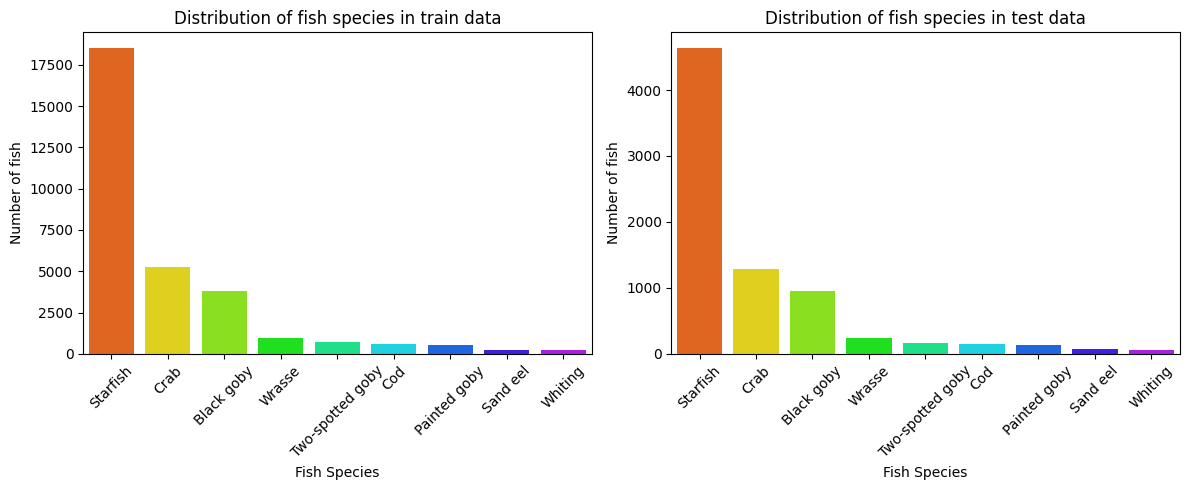

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

figs, ax = plt.subplots(1, 2, figsize=(12, 5))

custom_palette = sns.color_palette("gist_rainbow", len(species))  # or "bright", "Set2", etc.


sns.barplot(x=species, y=train_numbers, ax=ax[0],palette=custom_palette)

ax[0].set_title("Distribution of fish species in train data")
ax[0].set_ylabel("Number of fish")
ax[0].set_xlabel("Fish Species")
ax[0].set_xticklabels(species, rotation=45)

sns.barplot(x=species, y=test_numbers, ax=ax[1],palette=custom_palette)

ax[1].set_title("Distribution of fish species in test data")
ax[1].set_ylabel("Number of fish")
ax[1].set_xlabel("Fish Species")
ax[1].set_xticklabels(species, rotation=45)
sns.color_palette("hls", 10, as_cmap=True)
plt.tight_layout()
plt.show()

/Users/alteafogh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/alteafogh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


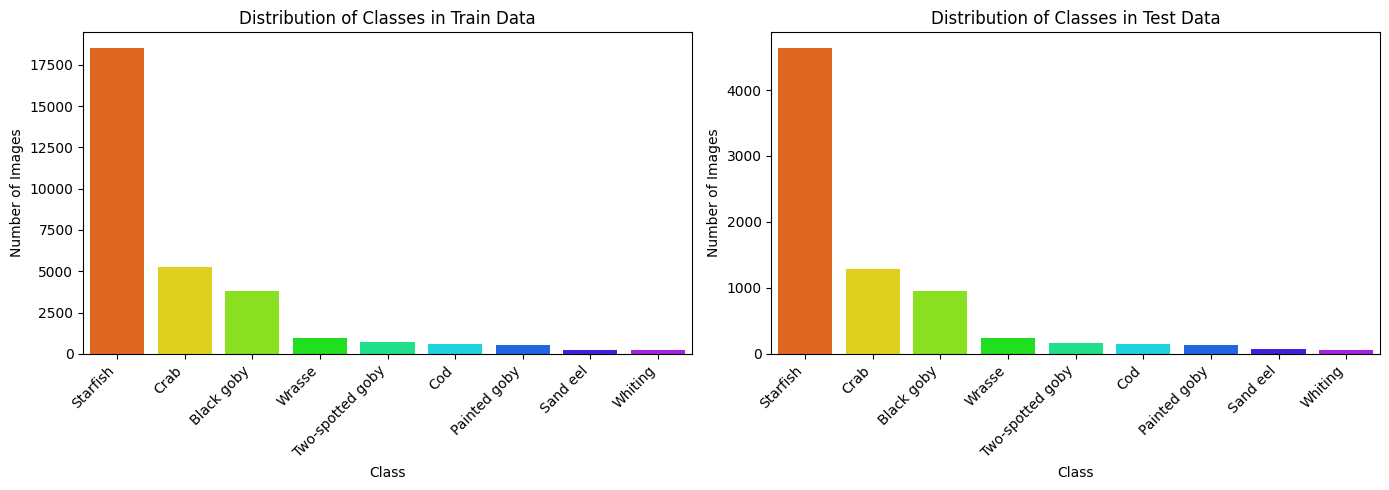

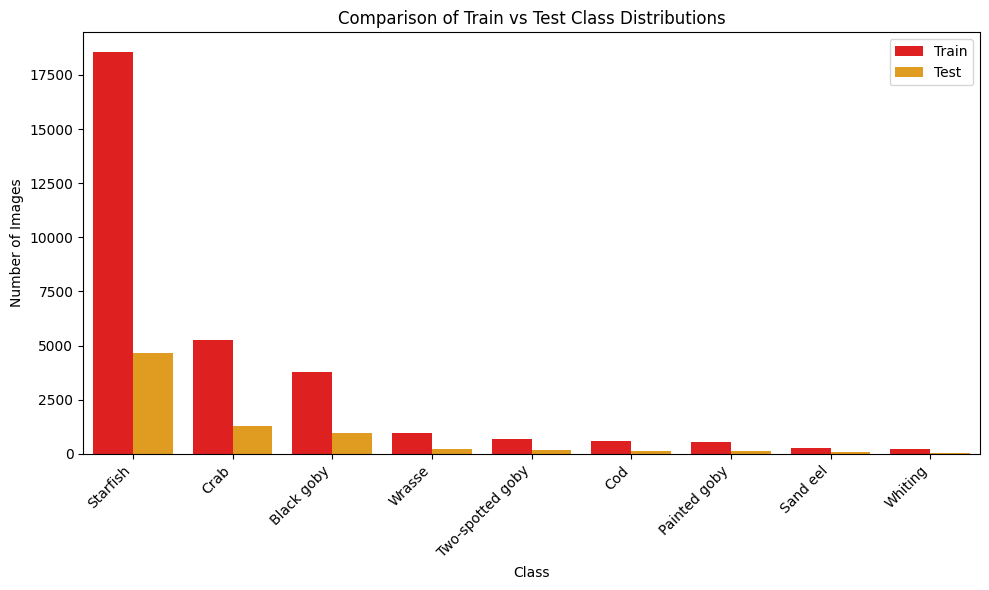

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

species = ["Starfish", "Crab", "Black goby", "Wrasse", "Two-spotted goby", "Cod" , "Painted goby", "Sand eel", "Whiting"]

train_numbers = [18540, 5241, 3802, 972, 700, 613, 549, 257, 203]
test_numbers = [4643, 1287, 950, 240, 171, 149, 130, 67, 58]

# === SETUP ===
custom_palette = sns.color_palette("gist_rainbow", len(species))

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# --- Left: train ---
sns.barplot(x=species, y=train_numbers, ax=ax[0], palette=custom_palette)
ax[0].set_title("Distribution of Classes in Train Data")
ax[0].set_ylabel("Number of Images")
ax[0].set_xlabel("Class")
ax[0].set_xticklabels(species, rotation=45, ha="right")

# --- Right: test ---
sns.barplot(x=species, y=test_numbers, ax=ax[1], palette=custom_palette)
ax[1].set_title("Distribution of Classes in Test Data")
ax[1].set_ylabel("Number of Images")
ax[1].set_xlabel("Class")
ax[1].set_xticklabels(species, rotation=45, ha="right")

plt.tight_layout()
plt.show()

# === Combined plot for comparison ===
df = pd.DataFrame({
    "Class": species * 2,
    "Count": train_numbers + test_numbers,
    "Split": ["Train"] * len(species) + ["Test"] * len(species)
})

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x="Class",
    y="Count",
    hue="Split",
    palette=["red", "orange"]
)
plt.title("Comparison of Train vs Test Class Distributions")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.xticks(rotation=45, ha="right")
plt.legend(title="")
plt.tight_layout()
plt.show()
